<a href="https://colab.research.google.com/github/chidambarambaskaran/machinne-learning-projects/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the dataset

In [107]:
dataset = pd.read_csv('train.csv')

Dropping the unwanted columns

In [108]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
dataset = dataset.drop(columns=columns_to_drop)

Converting the categorial into numerical values

In [109]:
from sklearn.impute import SimpleImputer
numerical_features = ['Age', 'Fare']
imputer = SimpleImputer(strategy='median')
dataset[numerical_features] = imputer.fit_transform(dataset[numerical_features])

Converting the Embarked values into most frequent values

In [110]:
categorical_features = ['Embarked']
imputer = SimpleImputer(strategy='most_frequent')
dataset[categorical_features] = imputer.fit_transform(dataset[categorical_features])

Encoding the categorial variables

In [111]:
dataset = pd.get_dummies(dataset, columns=['Sex', 'Embarked'], drop_first=True)

Scaling the values for better prediction

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

Assuming the independent and dependent variables

In [113]:
x = dataset.drop(columns=['Survived'])
y = dataset['Survived']

Splitting the dataset

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Linear Regression Model

In [115]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Predicting the test results

In [116]:
y_pred = regressor.predict(x_test)

In [117]:
threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)

Analysing the Metrics

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [119]:
print("Confusion Matrix:",cm)

Confusion Matrix: [[89 16]
 [21 53]]


In [120]:
print("Accuracy:",accuracy)

Accuracy: 0.7932960893854749


In [121]:
print("Classification Report:",cr)

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Visualizing the Results of the Titanic Prediction Model

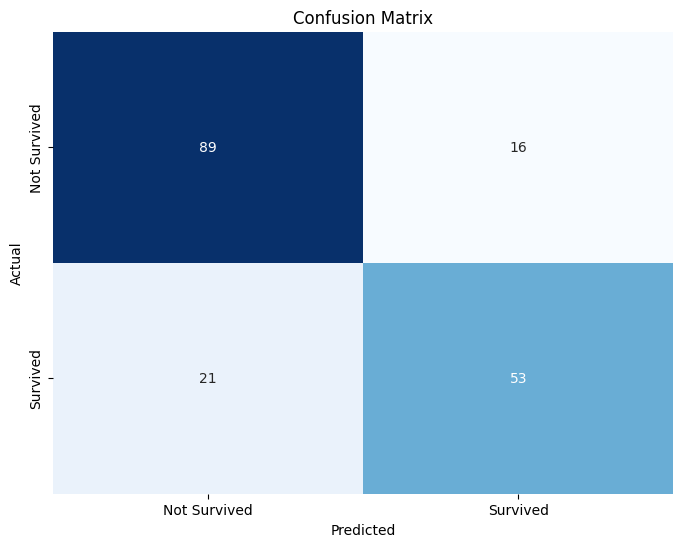

In [122]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()